In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

## 課題1
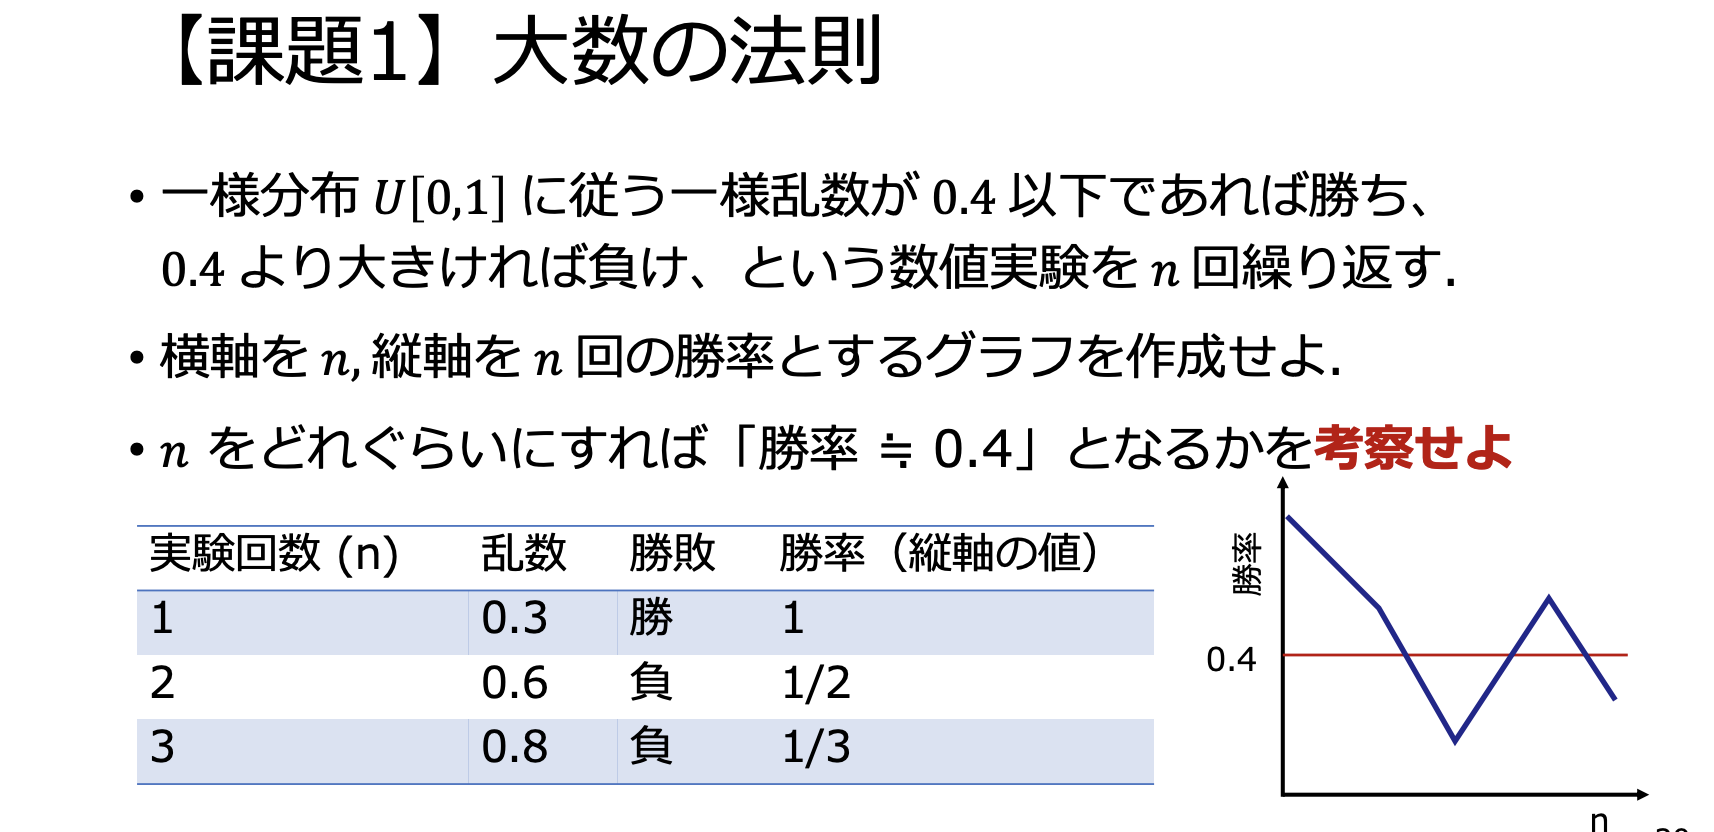

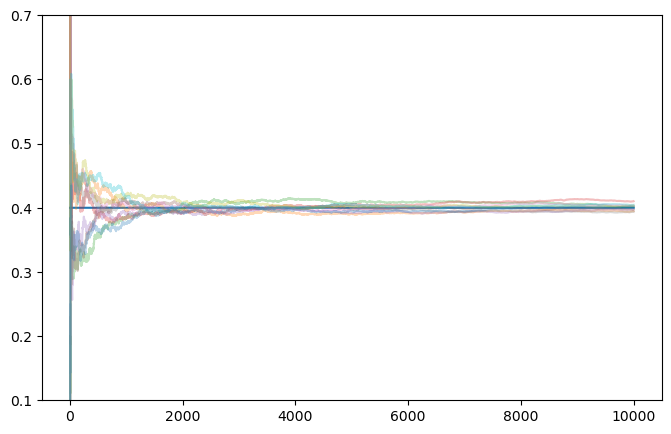

In [2]:
plt.figure(figsize=(8,5))
num_try = np.arange(10000)+1
plt.plot(num_try, np.array([0.4]* 10000))

for _ in range(10):
    arr = np.random.uniform(0, 1, 10000)
    arr_ = np.array([1 if val <= 0.4 else 0 for val in arr])
    mean_arr = [sum_/(i+1) for i, sum_ in enumerate(np.cumsum(arr_))] 
    plt.plot(num_try, mean_arr, alpha=0.3)

plt.ylim([0.1, 0.7])
plt.show()

## 課題2
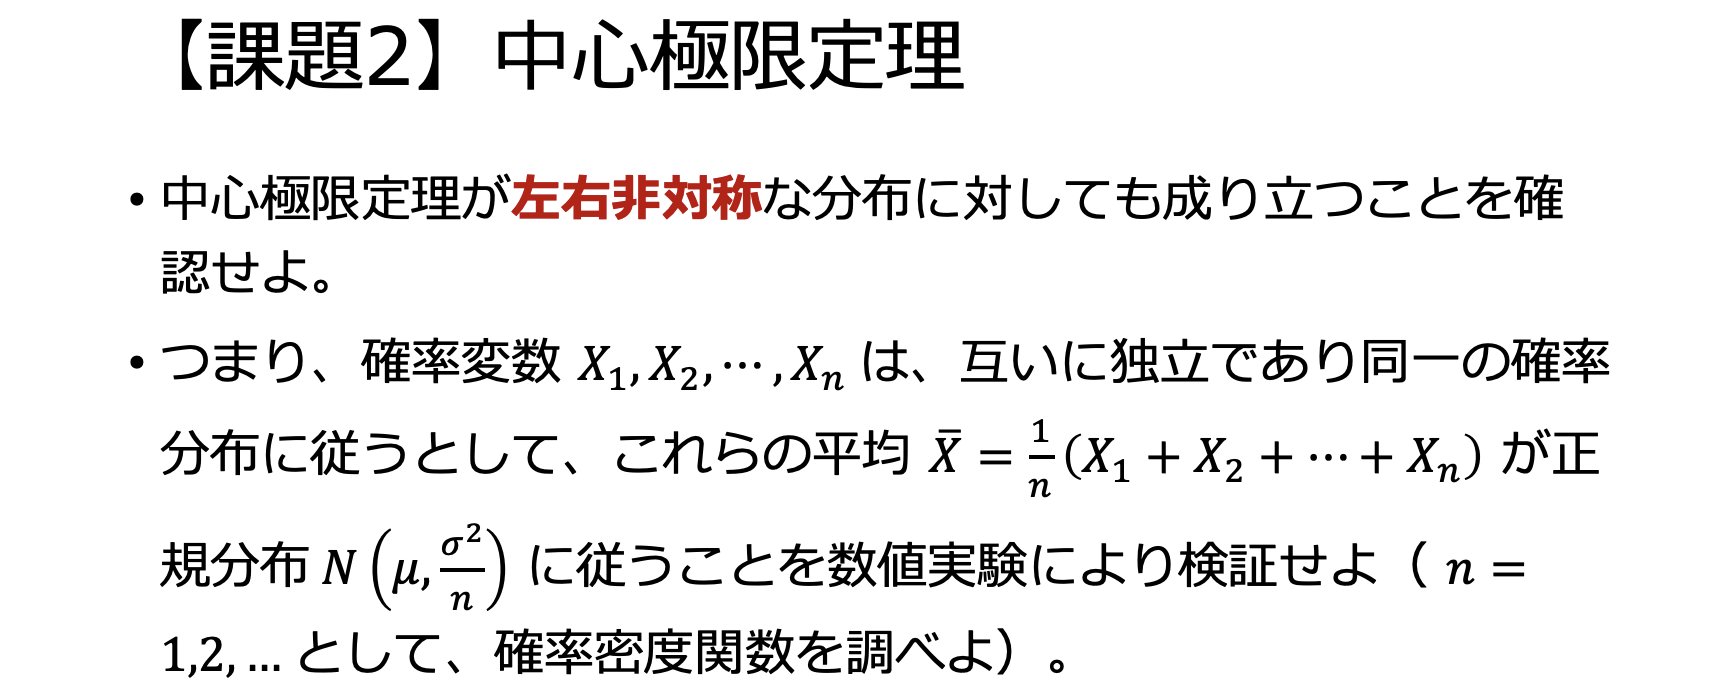

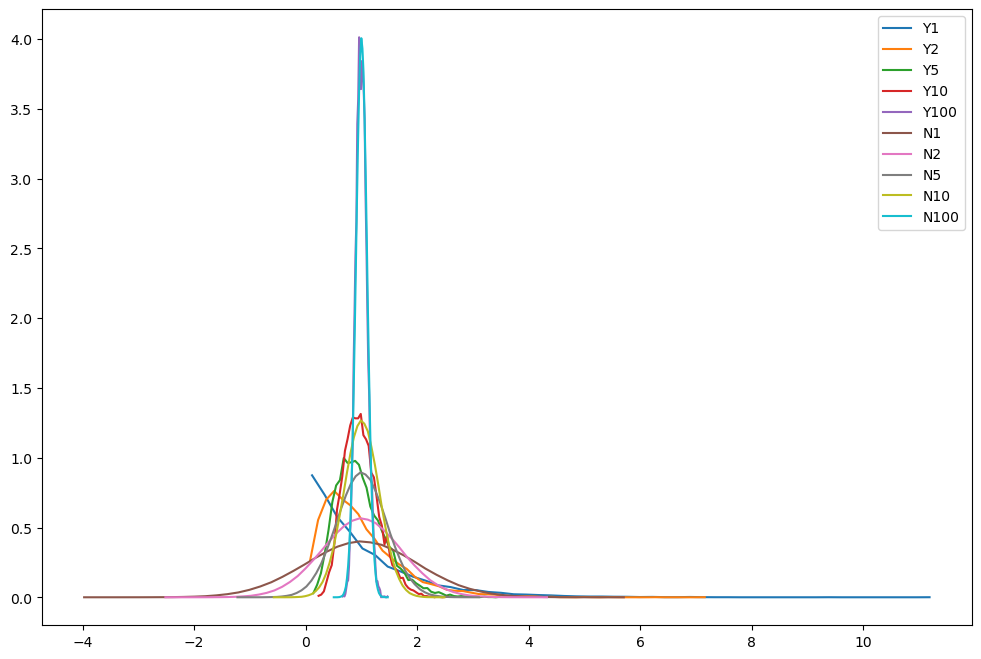

In [3]:
N = 10000
result = []
for i in range(N):
    arr = np.random.standard_exponential(100)
    mean_arr = [np.mean(arr[:i]) for i in [1, 2, 5, 10, 100]]
    result.append(mean_arr)
df = pd.DataFrame(result)

labels = ['Y1', 'Y2', 'Y5', 'Y10', 'Y100']
n_bins = 50
plt.figure(figsize=(12, 8))
for i, label in zip(range(5), labels):
    hy, bins = np.histogram(df[i], bins=n_bins, density=True)
    hx = bins[:-1] + np.diff(bins)/2
    plt.plot(hx,hy, label=label)

labels = ['N1', 'N2', 'N5', 'N10', 'N100']
arr = np.random.randn(1000000)
for n, label in zip([1, 2, 5, 10, 100], labels):
    hy, bins = np.histogram(arr/np.sqrt(n)+1, bins=n_bins, density=True)
    hx = bins[:-1] + np.diff(bins)/2
    plt.plot(hx,hy, label=label)
    
plt.legend()
plt.show()

# 説明

### 課題1
コードブロック1でライブラリのインポートしている．  
コードブロック2で乱数を10000個用意してそれらの平均が０．４に収束していく様子を描画している．  
具体的には7行目のarr_にi番目の乱数が0.4以下であるかを格納し，8行目でそれらの累積和を取ることで10000個の乱数のうち前半i個までに０．４以下の乱数が登場した割合をmean_arrに格納している．  
グラフからn=4000くらいで$winrate \fallingdotseq 0.4$となると判断した．

### 課題2

コードブロック3が課題2にあたる．  
平均1，分散１の指数分布による乱数の平均値を3-7行目で10000セット用意している．具体的には，4行目で100個の乱数を用意し，前半1, 2, 5, 10, 100個の乱数の平均を計算しそれらを2行目で初期化したresultに格納している．  
これらの結果を9-15行目で描画している．  
一方，18行目で標準正規分布からの乱数を10000個生成しarrに格納している．20行目のarr/np.sqrt(n)+1という変数変換で平均1，分散$1/\sqrt{n}$としている．
描画結果から，n=1, 2の時はグラフの重なりは小さいが，n=5, 10で大部分が重なり，n=100ではほぼ完全に重なることから左右非対称な分布についても中心極限定理が成り立つことが数値的に確認できた．